In [23]:
%matplotlib inline

import sys
import os
import re
sys.path.append("../") # go to parent dir


import torch
import torch.nn as nn
import matplotlib.pyplot as plt

#plt.rcParams["figure.figsize"] = (60,10)

import numpy as np
import h5py
import hdf5storage

from ipywidgets import IntProgress
from IPython.display import display
import time
from tqdm import tqdm
import json

In [2]:
def MSE(y, y_hat):
    return np.mean(np.power((y-y_hat), 2), axis=1)

def RMAE(y, y_hat):
    return np.mean(np.abs((y-y_hat)/y), axis=1)

def RMSE(y, y_hat):
    return np.sqrt(MSE(y, y_hat))

def MSE_tot(y, y_hat):
    return np.mean(np.power((y-y_hat), 2))

def visualize_and_compare(y, y_hat):
    
    fig, axs   = plt.subplots(1, 3, figsize=(15, 5))
    props1 = dict(boxstyle='round', facecolor='red', alpha=0.1)
    props2 = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    
    param_name = [r"$D$", r"$c_0$", r"$\alpha$"]
    mse        = MSE(y, y_hat)
    rmae       = RMAE(y, y_hat)
    
    for param in range(3):
        
        interval = [np.linspace(1,3), np.linspace(0.5,1), np.linspace(0.5,0.9)]
        
        axs[param].scatter(y[param, :], y_hat[param, :])
        axs[param].plot(interval[param], interval[param], 'r')
        axs[param].set_xlabel("y")
        axs[param].set_ylabel("y_hat")
        #axs[param].legend([])
        #axs[param].set_title(param_name[param])
        axs[param].text(0.05, 0.95, param_name[param], transform=axs[param].transAxes, fontsize=14,
        verticalalignment='top', bbox=props1)
        axs[param].text(0.05, 0.85, "MSE = %4.e" % (mse[param]), transform=axs[param].transAxes, fontsize=14,
        verticalalignment='top', bbox=props2)
        axs[param].text(0.05, 0.75, "RMAE = %4.e" % (rmae[param]), transform=axs[param].transAxes, fontsize=14,
        verticalalignment='top', bbox=props2)
        
        #print("MSE:", MSE(y, y_hat))
        
    #fig.suptitle('True vs Neural network')
    plt.show()
    

In [9]:
LSE_dir = "/home/sms/vws/data/test/frap_ann_test_data"

In [4]:
model = torch.load("/home/sms/vws/frappe/saved/tratt/test/20191024-1653.pt").cuda()
model.eval()

/home/sms/.conda/envs/torch/lib/python3.7/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'models.spatiotemporal.Tratt' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


Tratt(
  (body): Sequential(
    (0): Conv2d(110, 110, kernel_size=(4, 4), stride=(1, 1))
    (1): BatchNorm2d(110, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(110, 110, kernel_size=(3, 3), stride=(1, 1))
    (5): BatchNorm2d(110, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(110, 110, kernel_size=(3, 3), stride=(1, 1))
    (9): BatchNorm2d(110, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(110, 110, kernel_size=(3, 3), stride=(1, 1))
    (13): BatchNorm2d(110, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): MaxPool2d(kernel_size=2, stride=2, p

In [10]:
path = os.path.join(LSE_dir, "data_2088389000.mat")

In [11]:
data = hdf5storage.loadmat(path)

In [7]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'a', 't_exec', 'x_px', 'x_rc', 'y', 'y_hat_px', 'y_hat_rc'])

In [12]:
X = data["x_px"]
x = data["x_rc"]
y = data["y"]
y_px = data["y_hat_px"]
y_rc = data["y_hat_rc"]

In [13]:
Xnew = np.transpose(X, (3, 2, 0, 1))

Xnew = torch.Tensor(Xnew).cuda()

#y_nn = model(Xnew).cpu().detach().numpy().T

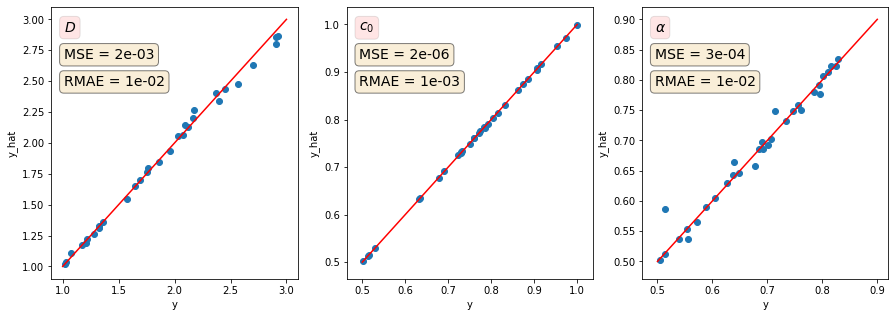

In [32]:
visualize_and_compare(y, y_rc)

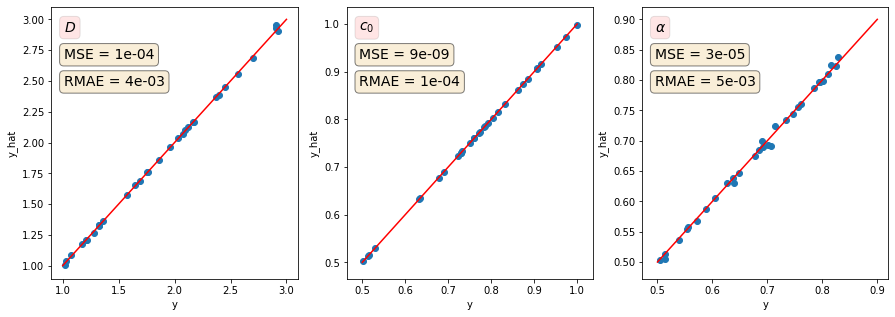

In [33]:
visualize_and_compare(y, y_px)

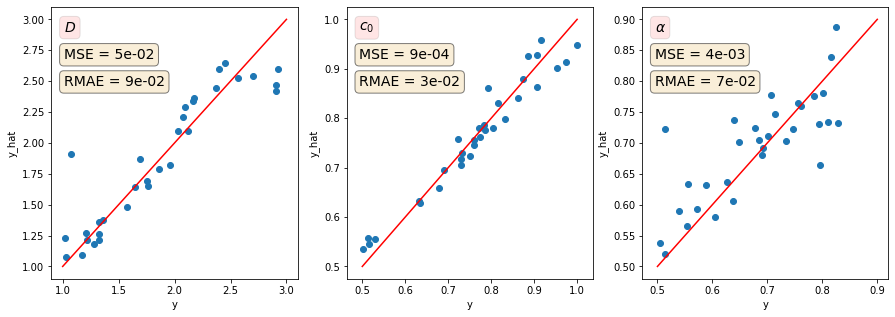

In [34]:
visualize_and_compare(y, y_nn)

In [ ]:
x_files =  [f for f in os.listdir(os.path.join("/home/sms/vws/data/spatiotemporal", "data")) if re.match(r'x+.*\.bin', f)]
y_files =  ["y_"+f.partition("_")[2] for f in x_files]

#X_path = os.path.join(self.directory, "data", x_files[idx])
#
#ys = [np.reshape(np.fromfile(os.path.join("/home/sms/vws/data/spatiotemporal", "data", file), dtype=np.float32), (3)) for file in y_files]

#ys = np.array(ys)

In [ ]:
plt.hist(ys[:,0], 100)
plt.show()

In [30]:
RMAE(y,y_rc)

array([0.01384562, 0.001268  , 0.0142589 ])

In [9]:
y.shape

(3, 32)

In [149]:
data_dir = "/media/sms/WD_PASSPORT/frap_ann/data_generation/data/data_1e-10_0.7_0.01/data_2116492003.mat"
y_dir = "/media/sms/WD_PASSPORT/frap_ann/data_generation/data/data_1e-10_0.7_0.01/y_2116492003.bin"
X_dir = "/media/sms/WD_PASSPORT/frap_ann/data_generation/data/data_1e-10_0.7_0.01/x_px_2116492003.bin"
a_dir = "/media/sms/WD_PASSPORT/frap_ann/data_generation/data/data_1e-10_0.7_0.01/a_2116492003.bin"

In [106]:
data = hdf5storage.loadmat(data_dir)

In [107]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'C0', 'D', 'a', 'alpha', 'random_seed', 'ss_px', 'ss_rc', 't_exec', 'y', 'y_hat_px', 'y_hat_rc'])

In [153]:
ss_px = data["ss_px"]
ss_rc = data["ss_rc"]
y_data = data["y"]
y_px = data["y_hat_px"]
y_rc = data["y_hat_rc"]

In [155]:
y_data.squeeze()

array([2.24987747, 0.75      , 0.7       ])

In [109]:
X = np.fromfile(X_dir, dtype=np.float32)
y = np.fromfile(y_dir, dtype=np.float32)

#print(X.shape)
X = np.reshape(X, (32, 1, 110, 256, 256), order="F")
y = np.reshape(y, (32, 3), order="F")

#Xnew = torch.Tensor(Xnew).cuda()

In [4]:
from models.spatiotemporal import Tratt

model = Tratt(8)
model.load_state_dict(torch.load("/home/sms/vws/frappe/saved/longtime/2k/States/states"))
model.eval()


Tratt(
  (body): Sequential(
    (0): Conv2d(110, 110, kernel_size=(4, 4), stride=(1, 1))
    (1): BatchNorm2d(110, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(110, 110, kernel_size=(3, 3), stride=(1, 1))
    (5): BatchNorm2d(110, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(110, 110, kernel_size=(3, 3), stride=(1, 1))
    (9): BatchNorm2d(110, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(110, 110, kernel_size=(3, 3), stride=(1, 1))
    (13): BatchNorm2d(110, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): MaxPool2d(kernel_size=2, stride=2, p

In [ ]:
y_nn = model(torch.from_numpy(X))
y_nn = y_nn.detach().numpy()

In [112]:
np.mean(y_nn, axis=0)

array([2.2662253 , 0.7516835 , 0.72419035], dtype=float32)

In [113]:
np.std(y_nn, axis=0)

array([0.0035051 , 0.00128376, 0.00186597], dtype=float32)

In [156]:
np.std(y_rc, axis=1)

array([0.0108084 , 0.00039994, 0.00564429])

In [115]:
np.std(y_px.T, axis=0)

array([1.96747991e-03, 5.51518291e-05, 1.18279784e-03])

In [148]:
print(MSE(y.T, y_nn.T))
print(MSE(y.T, y_px))
print(MSE(y.T, y_rc))

[2.7954104e-04 4.4822236e-06 5.8865896e-04]
[3.89962552e-06 3.04196120e-09 1.61309748e-06]
[1.19430011e-04 1.67878846e-07 3.25605907e-05]


In [20]:
def collect_results(model, data_dir):
    
    result_dirs = os.listdir(data_dir)

    count = 0
    results = []
    
    with tqdm(total=len(result_dirs), file=sys.stdout) as pbar:
        for result_dir in result_dirs:

            noise = [f for f in os.listdir(os.path.join(data_dir, result_dir)) if re.match(r'a_+.*\.bin', f)]
            Xs    = [f for f in os.listdir(os.path.join(data_dir, result_dir)) if re.match(r'x_px_+.*\.bin', f)]
            ys    = ["y_"+f.partition("px_")[2] for f in Xs]
            y_hat_pxs    = ["y_hat_ls_px_"+f.partition("px_")[2] for f in Xs]
            y_hat_rcs    = ["y_hat_ls_rc_"+f.partition("px_")[2] for f in Xs]

            datas = [f for f in os.listdir(os.path.join(data_dir, result_dir)) if re.match(r'.*\.mat', f)]


            n_files = len(Xs)

            y_pxs = []
            y_rcs = []
            y_nns = []
            y_all = []


            # All data should have the same settings and targets

            for idx in range(n_files):

                # Extract the test data
                a_dir    = os.path.join(data_dir, result_dir, noise[idx])
                X_dir    = os.path.join(data_dir, result_dir, Xs[idx])
                y_dir    = os.path.join(data_dir, result_dir, ys[idx])
                y_px_dir = os.path.join(data_dir, result_dir, y_hat_pxs[idx])
                y_rc_dir = os.path.join(data_dir, result_dir, y_hat_rcs[idx])

                #mat_dir = os.path.join(data_dir, result_dir, datas[idx])

                a = np.fromfile(a_dir, dtype=np.float32)
                X = np.fromfile(X_dir, dtype=np.float32)
                y = np.fromfile(y_dir, dtype=np.float32)
                y_px = np.fromfile(y_px_dir, dtype=np.float32)
                y_rc = np.fromfile(y_rc_dir, dtype=np.float32)

                a = np.reshape(a, (32, 1), order="F")
                a = a.T

                X = np.reshape(X, (32, 1, 110, 256, 256), order="F")

                y = np.reshape(y, (32, 3), order="F")
                y = y.T

                y_px = np.reshape(y_px, (32, 3), order="F")
                y_px = y_px.T

                y_rc = np.reshape(y_rc, (32, 3), order="F")
                y_rc = y_rc.T


                # Calculate the results from neural network
                y_nn = model(torch.from_numpy(X))
                y_nn = y_nn.detach().numpy().T

                y_pxs.append(y_px)
                y_rcs.append(y_rc)
                y_nns.append(y_nn)
                y_all.append(y)

                D     = y[0,0]
                c     = y[1,0]
                alpha = y[2,0]
                a     = a[0,0]


            y_pxs = np.concatenate(y_pxs, axis=1)
            y_rcs = np.concatenate(y_rcs, axis=1)
            y_nns = np.concatenate(y_nns, axis=1)
            y_all = np.concatenate(y_all, axis=1)

            mean_px = np.mean(y_pxs, axis=1)
            mean_rc = np.mean(y_rcs, axis=1)
            mean_nn = np.mean(y_nns, axis=1)
            std_px  = np.std(y_pxs, axis=1)
            std_rc  = np.std(y_rcs, axis=1)
            std_nn  = np.std(y_nns, axis=1)
            mse_px  = MSE(y_all, y_pxs)
            mse_rc  = MSE(y_all, y_rcs)
            mse_nn  = MSE(y_all, y_nns)




            results_dict = {"settings": [D, c, alpha, a], 
                            "px": {"mean": list(mean_px), "std": list(std_px), "mse": list(mse_px)}, 
                            "rc": {"mean": list(mean_rc), "std": list(std_rc), "mse": list(mse_rc)}, 
                            "nn": {"mean": list(mean_nn), "std": list(std_nn), "mse": list(mse_nn)}
                           }

            results.append(results_dict)

            pbar.set_description('processed: %d' % (1 + count))
            pbar.update(1)
            count += 1


        return results

            
            


In [21]:
results = collect_results(model, "/media/sms/WD_PASSPORT/frap_ann/data_generation/data")

processed: 125: 100%|██████████| 125/125 [12:22:35<00:00, 356.44s/it]  


In [26]:
import pickle

with open('results' + '.pkl', 'wb') as f:
    pickle.dump(results, f, pickle.HIGHEST_PROTOCOL)
    
with open('results' + '.pkl', 'rb') as f:
    data = pickle.load(f)

In [27]:
data

[{'settings': [2.2498775, 0.75, 0.5, 0.001],
  'px': {'mean': [2.2499073, 0.7500008, 0.49996626],
   'std': [0.0004738874, 1.525781e-05, 0.00057842786],
   'mse': [2.2544852e-07, 2.3339422e-10, 3.3571428e-07]},
  'rc': {'mean': [2.2502263, 0.7499917, 0.49961516],
   'std': [0.002782158, 0.00015894172, 0.0028066179],
   'mse': [7.862086e-06, 2.5331019e-08, 8.025173e-06]},
  'nn': {'mean': [2.270506, 0.75066453, 0.546912],
   'std': [0.0010334005, 0.00051946036, 0.0011468953],
   'mse': [0.00042654388, 7.113786e-07, 0.0022020473]}},
 {'settings': [2.2498775, 0.75, 0.5, 0.005],
  'px': {'mean': [2.249908, 0.7500001, 0.49998134],
   'std': [0.0010272455, 3.446149e-05, 0.0012659436],
   'mse': [1.0561693e-06, 1.1876112e-09, 1.6029613e-06]},
  'rc': {'mean': [2.249851, 0.7500248, 0.49985915],
   'std': [0.0059344107, 0.00034301143, 0.006049752],
   'mse': [3.5217938e-05, 1.1827279e-07, 3.661933e-05]},
  'nn': {'mean': [2.2648358, 0.75268734, 0.54323685],
   'std': [0.0023268722, 0.0011682238

[{'settings': [2.2498775, 0.75, 0.5, 0.001],
  'px': {'mean': [2.2499073, 0.7500008, 0.49996626],
   'std': [0.0004738874, 1.525781e-05, 0.00057842786],
   'mse': [2.2544852e-07, 2.3339422e-10, 3.3571428e-07]},
  'rc': {'mean': [2.2502263, 0.7499917, 0.49961516],
   'std': [0.002782158, 0.00015894172, 0.0028066179],
   'mse': [7.862086e-06, 2.5331019e-08, 8.025173e-06]},
  'nn': {'mean': [2.270506, 0.75066453, 0.546912],
   'std': [0.0010334005, 0.00051946036, 0.0011468953],
   'mse': [0.00042654388, 7.113786e-07, 0.0022020473]}},
 {'settings': [2.2498775, 0.75, 0.5, 0.005],
  'px': {'mean': [2.249908, 0.7500001, 0.49998134],
   'std': [0.0010272455, 3.446149e-05, 0.0012659436],
   'mse': [1.0561693e-06, 1.1876112e-09, 1.6029613e-06]},
  'rc': {'mean': [2.249851, 0.7500248, 0.49985915],
   'std': [0.0059344107, 0.00034301143, 0.006049752],
   'mse': [3.5217938e-05, 1.1827279e-07, 3.661933e-05]},
  'nn': {'mean': [2.2648358, 0.75268734, 0.54323685],
   'std': [0.0023268722, 0.0011682238

In [29]:
import pandas as pd

In [31]:
df = pd.DataFrame(columns=['D', 'c', 'alpha', 'a', 'D_px_mean', 'D_px_std', 'D_px_mse',
                                                   'D_rc_mean', 'D_rc_std', 'D_rc_mse',
                                                   'D_nn_mean', 'D_nn_std', 'D_nn_mse',
                                                   'c_px_mean', 'c_px_std', 'c_px_mse',
                                                   'c_rc_mean', 'c_rc_std', 'c_rc_mse',
                                                   'c_nn_mean', 'c_nn_std', 'c_nn_mse',
                                                   'alpha_px_mean', 'alpha_px_std', 'alpha_px_mse',
                                                   'alpha_rc_mean', 'alpha_rc_std', 'alpha_rc_mse',
                                                   'alpha_nn_mean', 'alpha_nn_std', 'alpha_nn_mse'])

In [37]:

rows = []
for x in data:
    
    data_dict = {}    
    data_dict.update({'D'             : x["settings"][0], 
                      'c'             : x["settings"][1], 
                      'alpha'         : x["settings"][2], 
                      'a'             : x["settings"][3], 
                      'D_px_mean'     : x["px"]["mean"][0], 
                      'D_px_std'      : x["px"]["std"][0], 
                      'D_px_mse'      : x["px"]["mse"][0],                             
                      'D_rc_mean'     : x["rc"]["mean"][0], 
                      'D_rc_std'      : x["rc"]["std"][0], 
                      'D_rc_mse'      : x["rc"]["mse"][0],
                      'D_nn_mean'     : x["nn"]["mean"][0], 
                      'D_nn_std'      : x["nn"]["std"][0], 
                      'D_nn_mse'      : x["nn"]["mse"][0],
                      'c_px_mean'     : x["px"]["mean"][1], 
                      'c_px_std'      : x["px"]["std"][1], 
                      'c_px_mse'      : x["px"]["mse"][1],
                      'c_rc_mean'     : x["rc"]["mean"][1], 
                      'c_rc_std'      : x["rc"]["std"][1], 
                      'c_rc_mse'      : x["rc"]["mse"][1],
                      'c_nn_mean'     : x["nn"]["mean"][1], 
                      'c_nn_std'      : x["nn"]["std"][1], 
                      'c_nn_mse'      : x["nn"]["mse"][1],
                      'alpha_px_mean' : x["px"]["mean"][2], 
                      'alpha_px_std'  : x["px"]["std"][2],
                      'alpha_px_mse'  : x["px"]["mse"][2],
                      'alpha_rc_mean' : x["rc"]["mean"][2], 
                      'alpha_rc_std'  : x["rc"]["std"][2], 
                      'alpha_rc_mse'  : x["rc"]["mse"][2],
                      'alpha_nn_mean' : x["nn"]["mean"][2], 
                      'alpha_nn_std'  : x["nn"]["std"][2],
                      'alpha_nn_mse'  : x["nn"]["mse"][2],  
                     })
    
    rows.append(data_dict)

df = pd.DataFrame(rows)  

In [38]:
df

,D,c,alpha,a,D_px_mean,D_px_std,D_px_mse,D_rc_mean,D_rc_std,D_rc_mse,...,c_nn_mse,alpha_px_mean,alpha_px_std,alpha_px_mse,alpha_rc_mean,alpha_rc_std,alpha_rc_mse,alpha_nn_mean,alpha_nn_std,alpha_nn_mse
0,2.249877,0.75,0.5,0.001,2.249907,0.000474,2.254485e-07,2.250226,0.002782,0.000008,...,7.113786e-07,0.499966,0.000578,3.357143e-07,0.499615,0.002807,8.025173e-06,0.546912,0.001147,0.002202
1,2.249877,0.75,0.5,0.005,2.249908,0.001027,1.056169e-06,2.249851,0.005934,0.000035,...,8.588444e-06,0.499981,0.001266,1.602961e-06,0.499859,0.006050,3.661933e-05,0.543237,0.002170,0.001874
2,2.249877,0.75,0.5,0.010,2.249690,0.001455,2.152418e-06,2.250227,0.008352,0.000070,...,9.993006e-06,0.500259,0.001869,3.559720e-06,0.499673,0.008360,6.999167e-05,0.542414,0.003301,0.001810
3,2.249877,0.75,0.5,0.050,2.249618,0.003416,1.173373e-05,2.249338,0.019861,0.000395,...,1.262211e-05,0.500273,0.004187,1.760635e-05,0.499760,0.020117,4.047374e-04,0.544355,0.006626,0.002011
4,2.249877,0.75,0.5,0.100,2.249758,0.004478,2.006555e-05,2.252636,0.025426,0.000654,...,2.675879e-05,0.500211,0.005805,3.374737e-05,0.495712,0.025809,6.845007e-04,0.543843,0.008461,0.001994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.948847,0.75,0.9,0.001,0.948851,0.000847,7.178980e-07,0.948994,0.002178,0.000005,...,4.750837e-05,0.900001,0.000079,6.249102e-09,0.899995,0.000172,2.956895e-08,0.911321,0.000430,0.000128
121,0.948847,0.75,0.9,0.005,0.948526,0.001926,3.813835e-06,0.948643,0.005232,0.000027,...,6.480351e-05,0.900023,0.000189,3.610841e-08,0.900022,0.000398,1.589625e-07,0.910888,0.000989,0.000120
122,0.948847,0.75,0.9,0.010,0.948932,0.002680,7.187147e-06,0.949032,0.006687,0.000045,...,4.882903e-05,0.900000,0.000264,6.969714e-08,0.899954,0.000537,2.906297e-07,0.910643,0.001238,0.000115
123,0.948847,0.75,0.9,0.050,0.948908,0.005724,3.277073e-05,0.949232,0.014975,0.000224,...,3.754150e-05,0.900021,0.000563,3.176124e-07,0.899998,0.001209,1.460626e-06,0.913364,0.002528,0.000185


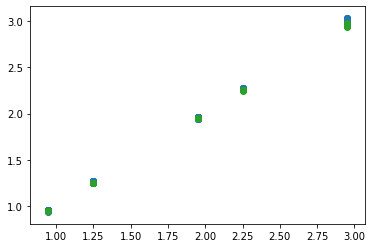

In [61]:
plt.scatter(df["D"], df["D_nn_mean"])
plt.scatter(df["D"], df["D_px_mean"])
plt.scatter(df["D"], df["D_rc_mean"])

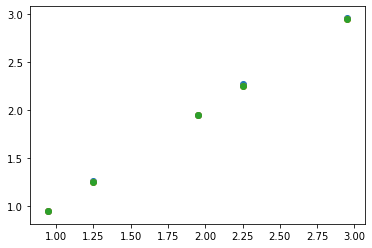

In [75]:

cond = df[(np.around(df["a"], 3) ==  0.001) & (df["alpha"]==0.5)]
plt.scatter(cond["D"], cond["D_nn_mean"])
plt.scatter(cond["D"], cond["D_rc_mean"])
plt.scatter(cond["D"], cond["D_px_mean"])

#plt.errorbar(cond["D"], cond["D_nn_mean"], yerr=cond["D_nn_std"], xerr=None, ls='none')
plt.show()

In [68]:
np.around(df["a"], 3)

0.1